In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
if torch.cuda.is_available():
    device = torch.device("cuda") 
else:
    device = torch.device("cpu")

In [3]:
from src.dataloader import *
from src.models import *
from src.trainer import *
from src.utils import *

In [12]:
DATADRIVE = '/datadrive_ssd/'

In [19]:
ds_train = TiggeMRMSDataset(
    tigge_dir=f'{DATADRIVE}/tigge/32km/',
    tigge_vars=['total_precipitation'],
    mrms_dir=f'{DATADRIVE}/mrms/4km/RadarOnly_QPE_06H/',
    rq_fn=f'{DATADRIVE}/mrms/4km/RadarQuality.nc',
    data_period=('2018-01', '2018-12'),
    first_days=5,
)

/anaconda/envs/nwp-downscale/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


Loading data


In [48]:
ds_train_log = TiggeMRMSDataset(
    tigge_dir=f'{DATADRIVE}/tigge/32km/',
    tigge_vars=['total_precipitation'],
    mrms_dir=f'{DATADRIVE}/mrms/4km/RadarOnly_QPE_06H/',
    rq_fn=f'{DATADRIVE}/mrms/4km/RadarQuality.nc',
    data_period=('2018-01', '2018-12'),
    first_days=5,
    tp_log=1e-1
)

/anaconda/envs/nwp-downscale/lib/python3.8/site-packages/xarray/core/indexing.py:1369: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


Loading data


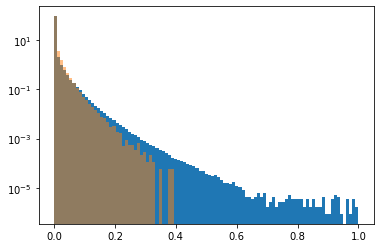

In [21]:
plt.hist(ds_train.mrms.values.flatten(), bins=np.linspace(0, 1, 100), density=True);
plt.hist(ds_train.tigge.values.flatten(), bins=np.linspace(0, 1, 100), density=True, alpha=0.5);
plt.yscale('log')

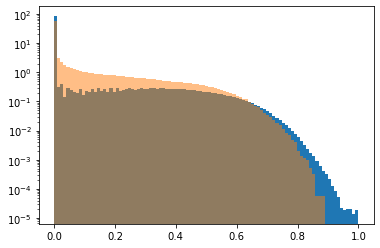

In [51]:
plt.hist(ds_train_log.mrms.values.flatten(), bins=np.linspace(0, 1, 100), density=True);
plt.hist(ds_train_log.tigge.values.flatten(), bins=np.linspace(0, 1, 100), density=True, alpha=0.5);
plt.yscale('log')
# plt.ylim(0, 2)

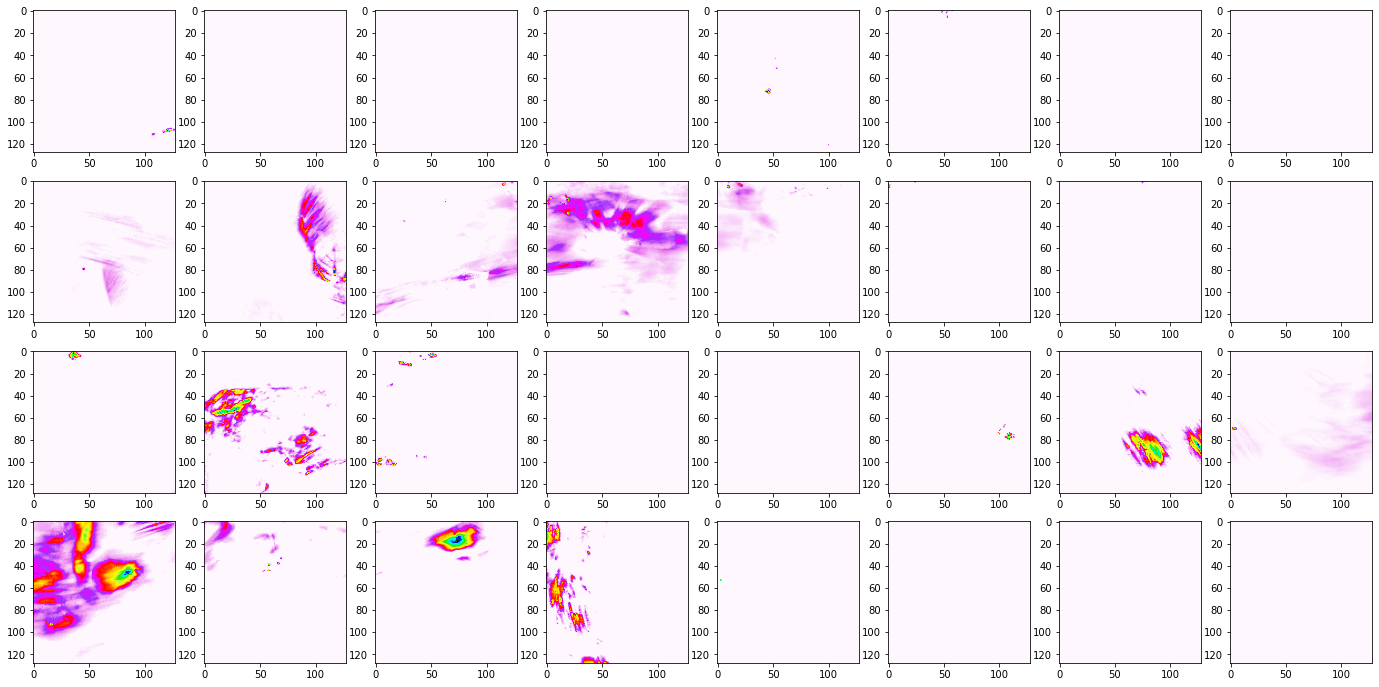

In [32]:
fig, axs = plt.subplots(4, 8, figsize=(24, 12))
for i, ax in enumerate(axs.flat):
    X, y = ds_train[i+62]
    ax.imshow(y[0], cmap='gist_ncar_r')

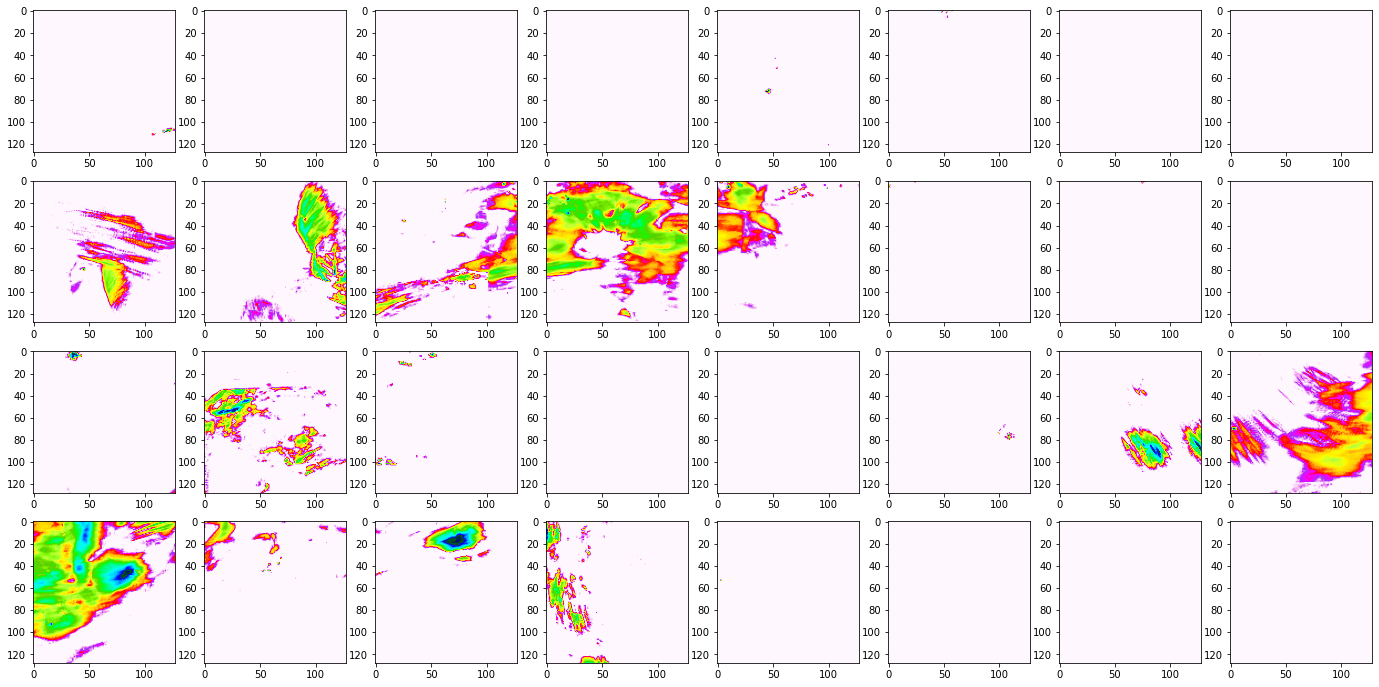

In [50]:
fig, axs = plt.subplots(4, 8, figsize=(24, 12))
for i, ax in enumerate(axs.flat):
    X, y = ds_train_log[i+62]
    ax.imshow(y[0], cmap='gist_ncar_r')